In [1]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
from collections import Counter
import pickle

In [2]:
saved_path = os.path.join(os.path.dirname(os.getcwd()), 'Saved Data\\')

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#sns.set(color_codes=True)
#%matplotlib inline
#plt.rcParams["figure.figsize"] = [16, 6]

In [4]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [5]:
with open(saved_path + 'req_tables.pickle', 'rb') as handle:
    dict_req_tables = pickle.load(handle)

with open(saved_path + 'req_atts.pickle', 'rb') as handle:
    dict_req_atts = pickle.load(handle)

with open(saved_path + 'req_orderby.pickle', 'rb') as handle:
    dict_req_orderby = pickle.load(handle)

with open(saved_path + 'req_groupby.pickle', 'rb') as handle:
    dict_req_groupby = pickle.load(handle)
    
with open(saved_path + 'req_having.pickle', 'rb') as handle:
    dict_req_having = pickle.load(handle)

In [6]:
df_tables = pd.read_csv(saved_path + 'df_tables.csv')
df_tables_stat = pd.read_csv(saved_path + 'df_tables_stat.csv')
max_data = df_tables[df_tables['table'].isin(df_tables_stat.sort_values(by='max', ascending=False)['table'][:20].values)]
moy_data = df_tables[df_tables['table'].isin(df_tables_stat.sort_values(by='moy', ascending=False)['table'][:20].values)]

### Where attributes 

In [7]:
list_all_atts = []
for att in list(dict_req_atts.values()) :
    list_all_atts = list_all_atts + att  

In [8]:
len(set(list_all_atts))

3294

In [9]:
'Frequency of atts on unique queries'
counts = Counter(list_all_atts)
counts = sorted(counts.items(), key = lambda x: x[1], reverse=True)
counts

[('fr.infologic.stocks.gestion.modele.mvtprevision.datprepsaisie', 2811),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.typmvt.originemvt', 1561),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.niveaumvt', 1553),
 ('fr.infologic.stocks.gestion.modele.mvtrealise.prod.ik', 1444),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.lieu.site.ik', 1380),
 ('fr.infologic.stocks.gestion.modele.mvtrealise.datprepsaisie', 1297),
 ('fr.infologic.stocks.gestion.modele.mvtrealise.dossierinfo.dosres', 1232),
 ('fr.infologic.stocks.gestion.modele.mvtrealise.flagannule', 1218),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.typrefexterne', 1153),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.refexterne', 1151),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.prod.nbjourreserveconsommof',
  1077),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.prod.nbjourreservecli',
  966),
 ('fr.infologic.stocks.gestion.modele.mvtprevision.prod.nbjourreserveprodof',
  960),
 ('fr.infologic.s

In [10]:
df_atts = pd.read_csv(saved_path + 'df_atts.csv')

In [11]:
atts_table = df_atts[df_atts['att'].str.contains('fr.infologic.ventes.cumuls.modele.cumulmultiple')]['att'].unique()
atts_table

array(['fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvart5',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvcli2',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvcli3',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvart4',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvart2',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvcli5',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvcli4',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvart3',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.valzvart1',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.datdeb',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.datfin',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.repres1.ik',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.dossierinfo.dosres',
       'fr.infologic.ventes.cumuls.modele.cumulmultiple.typcumul.ik',
       'fr.infologic.ventes.cumuls.modele.

In [16]:
sns.set(rc={'figure.figsize':(8,2)})

In [18]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

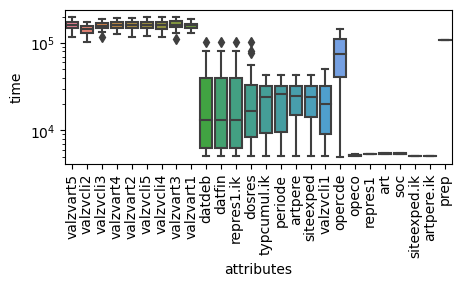

In [26]:
atts_table = df_atts[df_atts['att'].str.contains('fr.infologic.ventes.cumuls.modele.cumulmultiple')]['att'].unique()
atts = df_atts[df_atts['att'].isin(atts_table)]
atts['attributes'] = atts['att'].str.split('cumulmultiple.', expand = True)[1]
atts['time'] = atts['durationMS']
atts['attributes'] = atts['attributes'].str.replace('dossierinfo.dosres','dosres')
fig = plt.figure(figsize=(5, 2))
g = sns.boxplot(x="attributes", y="time", palette="husl", data = atts)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_yscale("log")

In [ ]:
for table in max_data['table'].value_counts().index :
    atts_table = df_atts[df_atts['att'].str.contains(table)]['att'].unique()
    atts = df_atts[df_atts['att'].isin(atts_table)]
    fig = plt.figure()
    g = sns.boxplot(x="att", y="durationMS", palette="husl", data = atts)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_yscale("log")

In [ ]:
for table in moy_data['table'].value_counts().index :
    atts_table = df_atts[df_atts['att'].str.contains(table)]['att'].unique()
    atts = df_atts[df_atts['att'].isin(atts_table)]
    if atts.shape[0] > 0 :   
        fig = plt.figure()
        g = sns.boxplot(x="att", y="durationMS", palette="husl", data = atts)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
        g.set_yscale("log")

### Having attributes 

In [ ]:
list_all_atts_having = []
for att_having in list(dict_req_having.values()) :
    list_all_atts_having  = list_all_atts_having  + att_having

In [ ]:
len(set(list_all_atts_having))

In [ ]:
counts = Counter(list_all_atts_having)
counts = sorted(counts.items(), key = lambda x: x[1], reverse=True)
counts

In [ ]:
df_atts_having = pd.read_csv(saved_path + 'df_atts_having.csv')

In [ ]:
list_all_tables = []
for table in list(dict_req_tables.values()) :
    list_all_tables = list_all_tables + table 

In [ ]:
for table in list_all_tables :
    atts_having_table = df_atts_having[df_atts_having['att_having'].str.contains(table)]['att_having'].unique()
    atts_having = df_atts_having[df_atts_having['att_having'].isin(atts_having_table)]
    if atts_having.shape[0] > 0 :
        fig = plt.figure()
        g = sns.boxplot(x="att_having", y="durationMS", palette="husl", data = atts_having)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
        g.set_yscale("log")

### Order by attributes 

In [ ]:
list_all_atts_orderby = []
for att_orderby in list(dict_req_orderby.values()) :
    list_all_atts_orderby  = list_all_atts_orderby  + att_orderby  

In [ ]:
len(set(list_all_atts_orderby))

In [ ]:
df_atts_orderby = pd.read_csv(saved_path + 'df_atts_orderby.csv')

In [ ]:
for table in max_data['table'].value_counts().index :
    atts_orderby_table = df_atts_orderby[df_atts_orderby['att_orderby'].str.contains(table)]['att_orderby'].unique()
    atts_orderby = df_atts_orderby[df_atts_orderby['att_orderby'].isin(atts_orderby_table)]
    if atts_orderby.shape[0] > 0 :
        fig = plt.figure()
        g = sns.boxplot(x="att_orderby", y="durationMS", palette="husl", data = atts_orderby)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
        g.set_yscale("log")

In [ ]:
for table in moy_data['table'].value_counts().index :
    atts_orderby_table = df_atts_orderby[df_atts_orderby['att_orderby'].str.contains(table)]['att_orderby'].unique()
    atts_orderby = df_atts_orderby[df_atts_orderby['att_orderby'].isin(atts_orderby_table)]
    if atts_orderby.shape[0] > 0 :
        fig = plt.figure()
        g = sns.boxplot(x="att_orderby", y="durationMS", palette="husl", data = atts_orderby)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
        g.set_yscale("log")

### Group by attributes 

In [ ]:
list_all_atts_groupby = []
for att_groupby in list(dict_req_groupby.values()) :
    list_all_atts_groupby  = list_all_atts_groupby  + att_groupby

In [ ]:
len(set(list_all_atts_groupby))

In [ ]:
counts = Counter(list_all_atts_groupby)
counts = sorted(counts.items(), key = lambda x: x[1], reverse=True)
counts

In [ ]:
df_atts_groupby = pd.read_csv(saved_path + 'df_atts_groupby.csv')

In [ ]:
for table in max_data['table'].value_counts().index :
    atts_groupby_table = df_atts_groupby[df_atts_groupby['att_groupby'].str.contains(table)]['att_groupby'].unique()
    atts_groupby = df_atts_groupby[df_atts_groupby['att_groupby'].isin(atts_groupby_table)]
    if atts_groupby.shape[0] > 0 :
        fig = plt.figure()
        g = sns.boxplot(x="att_groupby", y="durationMS", palette="husl", data = atts_groupby)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
        g.set_yscale("log")

In [ ]:
for table in moy_data['table'].value_counts().index :
    atts_groupby_table = df_atts_groupby[df_atts_groupby['att_groupby'].str.contains(table)]['att_groupby'].unique()
    atts_groupby = df_atts_groupby[df_atts_groupby['att_groupby'].isin(atts_groupby_table)]
    if atts_groupby.shape[0] > 0 :
        fig = plt.figure()
        g = sns.boxplot(x="att_groupby", y="durationMS", palette="husl", data = atts_groupby)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
        g.set_yscale("log")